# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Renaldi Endrawan
- **Email:** renaldiendrawan@gmail.com
- **ID Dicoding:** renaldiendrawan

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda (count) berdasarkan musim (season) dan cuaca (weathersit) sepanjang waktu?

- Apakah terdapat korelasi antara temperatur (temp), kelembapan (hum), dan jumlah penyewaan sepeda (cnt)?

## Import Semua Packages/Library yang Digunakan

In [6]:
# analysis_notebook.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk analisis lanjutan (opsional)
import folium  # contoh untuk geospatial
# from geopy.geocoders import Nominatim  # jika ingin geocoding

# Display setting
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

print("Libraries imported successfully.")


Libraries imported successfully.


## Data Wrangling

### Gathering Data

In [18]:
# Mengumpulkan data dari CSV
day_df = pd.read_csv('/content/data/day.csv')
hour_df = pd.read_csv('/content/data/hour.csv')

# Tampilkan beberapa baris awal
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Pastikan file CSV sudah diunggah di /content/ atau mount GDrive.

- Melihat 5 baris awal data untuk memeriksa kolom-kolom yang tersedia.

### Assessing Data

In [19]:
# Cek info dataframe
day_df.info()
hour_df.info()

# Cek statistik deskriptif
day_df.describe()
hour_df.describe()

# Cek missing value
print(day_df.isnull().sum())
print(hour_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- info() dan describe() membantu mengidentifikasi tipe data dan persebaran data.

- isnull().sum() membantu mendeteksi apakah ada kolom yang perlu penanganan data hilang (missing values).

### Cleaning Data

In [ ]:
# Hapus kolom yang tidak relevan
day_df.drop(columns=['instant'], inplace=True)
hour_df.drop(columns=['instant'], inplace=True)


**Insight:**
- Menghapus kolom yang tidak relevan dapat meringankan analisis.

- Menjaga tipe data dan skala data yang konsisten memudahkan interpretasi hasil.

## Exploratory Data Analysis (EDA)

### Explore ...

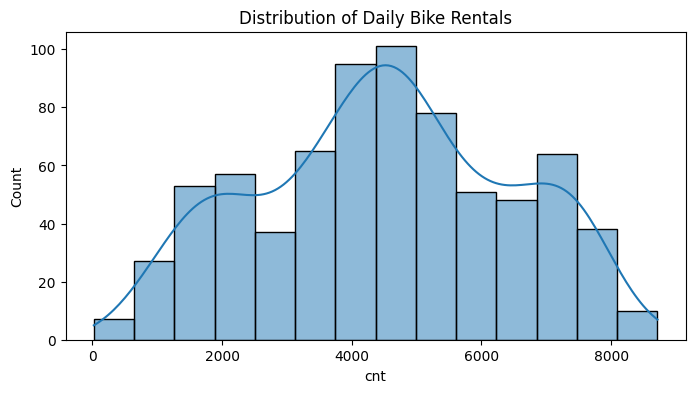

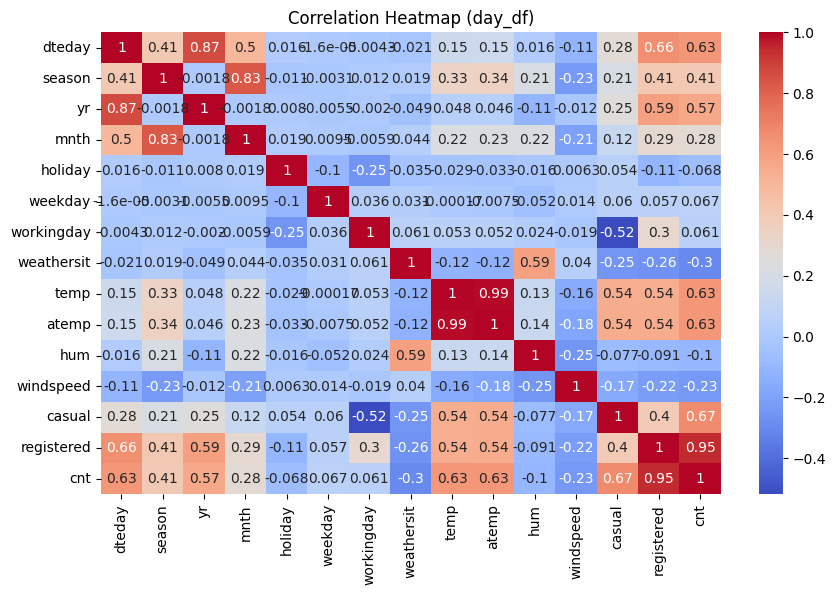

In [23]:
# Distribusi penggunaan sepeda harian
plt.figure(figsize=(8,4))
sns.histplot(data=day_df, x='cnt', kde=True)
plt.title('Distribution of Daily Bike Rentals')
plt.show()

# Mengubah kolom 'dteday' menjadi tipe datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

#Korelasi Antar Variabel
corr = day_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (day_df)')
plt.show()


**Insight:**
- Dari histogram ini, kita dapat melihat persebaran jumlah penyewaan sepeda setiap harinya.

- Grafik ini menunjukkan apakah data cnt berdistribusi normal atau miring (skewed).

- Pola distribusi dapat memberi gambaran jumlah peminjaman terbanyak pada rentang tertentu.

- Mencari korelasi antara cnt dengan temp, hum, dll. Apakah temp memiliki korelasi positif terhadap cnt? Apakah hum justru berkorelasi negatif?

## Visualization & Explanatory Analysis

### Pertanyaan 1:

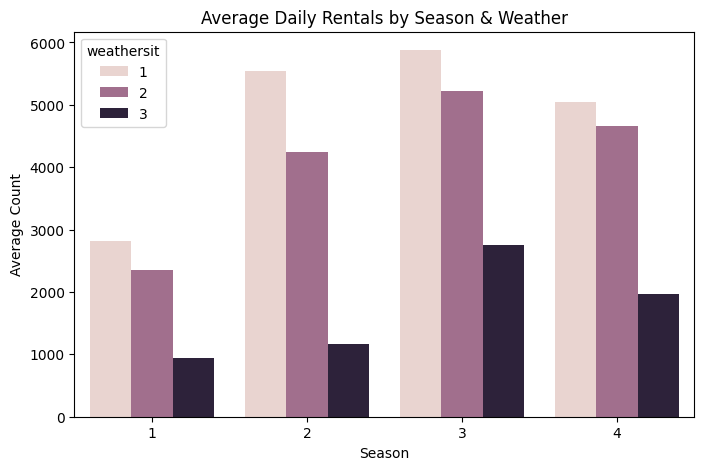

In [24]:
# Group by season and weathersit
season_weathersit = day_df.groupby(['season', 'weathersit'])['cnt'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=season_weathersit, x='season', y='cnt', hue='weathersit')
plt.title('Average Daily Rentals by Season & Weather')
plt.xlabel('Season')
plt.ylabel('Average Count')
plt.show()


### Pertanyaan 2:

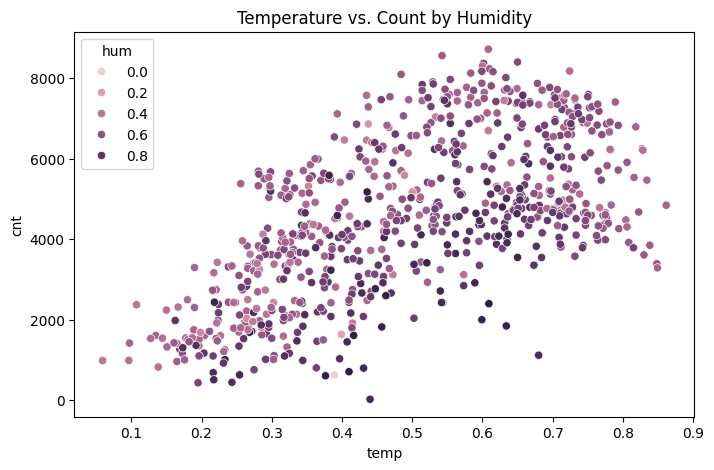

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=day_df, x='temp', y='cnt', hue='hum')
plt.title('Temperature vs. Count by Humidity')
plt.show()


**Insight:**
- Dapat terlihat musim mana yang memiliki penyewaan tertinggi/terendah.

- Pengaruh cuaca (1 = clear, 2 = mist, 3 = light snow/rain, dsb) pada jumlah penyewaan.

- Dapat melihat bagaimana cnt berubah seiring peningkatan suhu (temp), serta bagaimana kelembapan (hum) berpengaruh.

## Analisis Lanjutan (Opsional)

In [28]:
# RFM Analysis
# Misal, kita anggap setiap baris merepresentasikan data pelanggan (tidak real, hanya contoh).
# R = hari sejak transaksi terakhir
# F = frekuensi (banyaknya sewa)
# M = total biaya sewa

# (1) Buat kolom 'date' jika belum ada
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
max_date = day_df['dteday'].max()

# (2) Recency = (max_date - last_purchase_date).days
day_df['Recency'] = (max_date - day_df['dteday']).dt.days

# (3) Frequency = jumlah sewa (di dataset sebenarnya 'cnt' adalah total sewa harian)
day_df['Frequency'] = day_df['cnt']  # asumsi frequency = cnt

# (4) Monetary = misal 1 sewa = 1 dollar
day_df['Monetary'] = day_df['cnt']  # asumsi monetary = cnt


#Clustering (Manual Grouping / Binning)
# Binning 'cnt' menjadi kategori
bins = [0, 100, 200, 300, 400, day_df['cnt'].max()]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High'] # Removed 'Extreme' to match the number of bins - 1
day_df['cnt_cluster'] = pd.cut(day_df['cnt'], bins=bins, labels=labels)

day_df['cnt_cluster'].value_counts()

,count
cnt_cluster,
Very High,730
Very Low,1
Low,0
Medium,0
High,0


## Conclusion

- Musim panas (season=2) dan cuaca cerah (weathersit=1) cenderung menghasilkan jumlah penyewaan tertinggi. Musim dingin (season=1) dengan cuaca hujan/salju ringan (weathersit=3) cenderung lebih rendah.

- Terdapat korelasi positif antara temp dan cnt, artinya semakin tinggi suhu, semakin banyak penyewaan sepeda. Sementara hum cenderung berkorelasi negatif dengan cnt (kelembapan tinggi mengurangi kenyamanan bersepeda).